In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [2]:
dir_name= "C:/Users/HP/Downloads/dataset1/faces/"
y=[]
X=[]
target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path = dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        #formulate the imgae path 
        image_path = dir_path+image_name
        #Read the input image
        img = cv2.imread(image_path)
        #convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #resize image to 300*300 dimension
        resized_image= cv2.resize(gray,(h,w))
        #convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        # increase the number of samples
        n_samples =n_samples+1
        #Adding the categorical label
        y.append(person_id)
        #adding the person name
        target_names.append(person_name)
    #Increase the person id by 1
    person_id=person_id+1
# ##############################################################################################################
#transform list to numpy array
y=np.array(y)
X=np.array(X)
target_names=np.array(target_names)
n_features=X.shape[1]
target_names = np.array(class_names)   # unique person names
n_classes = len(target_names)
print(y.shape,X.shape,target_names.shape)
print("Number of samples:",n_samples)
#Download the data,if not already on disk and load it as numpy arrays

#lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)

##introspect the images arrays to find the shapes(for plotting)
#n-samples,h,w=lfw_people.images.shape
##print(n_samples,h,w)
##for machine learning we use the 2 data directly(as relative pixel 
## positions info is ignored by this model)
#X=lfw_people.data
#n_features=X.shape[1]

#print (x.shape)
##the label to predict is the id of the person
#y=lfw_people.target
#print(y)
#if 0 in y:
#if print("yes")
#target_names-lfw_people.target_names
#print(target_names)
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_feature: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (9,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_feature: 90000
n_classes: 9


Extracting the top 150 eigenfaces from 337 faces


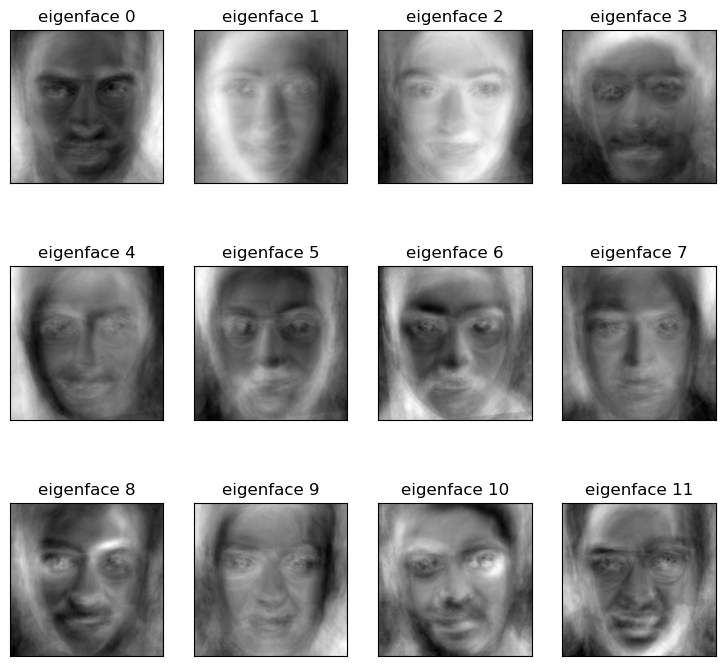

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [3]:
######################################################################################################
#Split into a training set and a test set using a stratified k fold

#split into a training and testing set
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

######################################################################################################
# Compute a PCA(eigenfaces)an the face dataset(treated as unlabeled dataset):
#unsupervised feature extraction/dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))

#Applying PCA
pca=PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

#Generating eigenfaces
eigenfaces=pca.components_.reshape((n_components, h, w))

#plot the gallary of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

#%%Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
#Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")

In [4]:
#Training with Multi layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.31244055
Iteration 2, loss = 2.27422657
Iteration 3, loss = 2.23710245
Iteration 4, loss = 2.20298375
Iteration 5, loss = 2.16938222
Iteration 6, loss = 2.13765174
Iteration 7, loss = 2.10655786
Iteration 8, loss = 2.07691596
Iteration 9, loss = 2.04813446
Iteration 10, loss = 2.02049974
Iteration 11, loss = 1.99417466
Iteration 12, loss = 1.96831988
Iteration 13, loss = 1.94389283
Iteration 14, loss = 1.91961852
Iteration 15, loss = 1.89638083
Iteration 16, loss = 1.87362684
Iteration 17, loss = 1.85127268
Iteration 18, loss = 1.82967214
Iteration 19, loss = 1.80823564
Iteration 20, loss = 1.78727989
Iteration 21, loss = 1.76645506
Iteration 22, loss = 1.74693947
Iteration 23, loss = 1.72661027
Iteration 24, loss = 1.70726677
Iteration 25, loss = 1.68768114
Iteration 26, loss = 1.66875890
Iteration 27, loss = 1.64978587
Iteration 28, loss = 1.63106893
Iteration 29, loss = 1.61230557
Iteration 30, loss = 1.59296397
Iteration 31, loss = 1.57394347
Iteration 32, los

In [10]:
THRESHOLD = 0.65

Accuracy: 71.68%


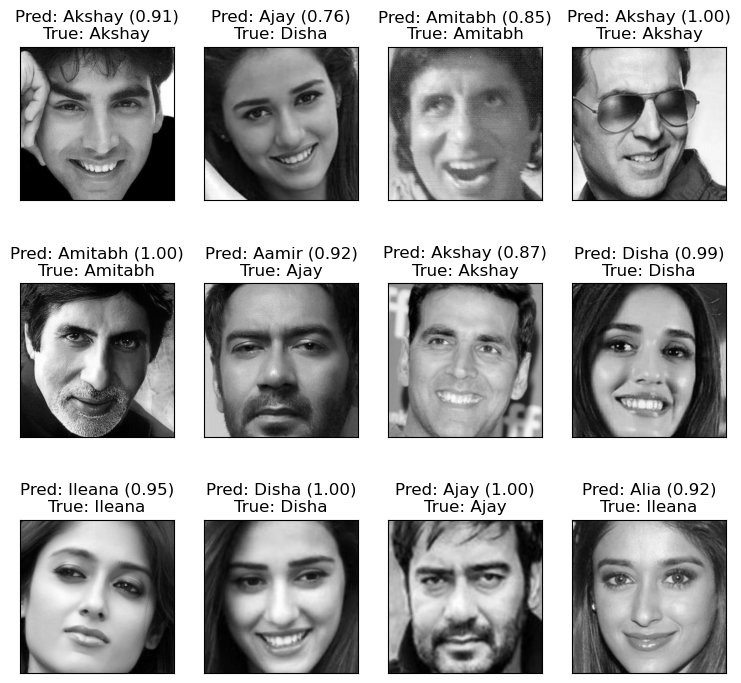

In [11]:
y_pred = []
y_prob = []

for test_face in X_test_lda:
    
    prob = clf.predict_proba([test_face])[0]
    max_prob = np.max(prob)
    class_id = np.argmax(prob)
    
    # Unknown detection logic
    if max_prob < THRESHOLD:
        y_pred.append(-1)   # -1 represents UNKNOWN
    else:
        y_pred.append(class_id)
    
    y_prob.append(max_prob)

y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    
    true_name = class_names[y_test[i]]
    
    if y_pred[i] == -1:
        pred_name = "UNKNOWN"
    else:
        pred_name = class_names[y_pred[i]]
    
    result = "Pred: %s (%.2f)\nTrue: %s" % (pred_name, y_prob[i], true_name)
    prediction_titles.append(result)
    
    if pred_name == true_name:
        true_positive += 1

print("Accuracy: %.2f%%" % (true_positive * 100 / y_pred.shape[0]))

## plot results
plot_gallery(X_test, prediction_titles , h, w)
plt.show()


Classification Report:

              precision    recall  f1-score   support

       Aamir       0.71      0.83      0.77        12
        Ajay       0.90      0.75      0.82        12
      Akshay       0.75      0.69      0.72        13
        Alia       0.67      0.62      0.64        13
     Amitabh       1.00      0.85      0.92        13
     Deepika       0.62      0.67      0.64        12
       Disha       1.00      0.77      0.87        13
      Farhan       0.90      0.75      0.82        12
      Ileana       0.78      0.54      0.64        13
     UNKNOWN       0.00      0.00      0.00         0

    accuracy                           0.72       113
   macro avg       0.73      0.65      0.68       113
weighted avg       0.81      0.72      0.76       113



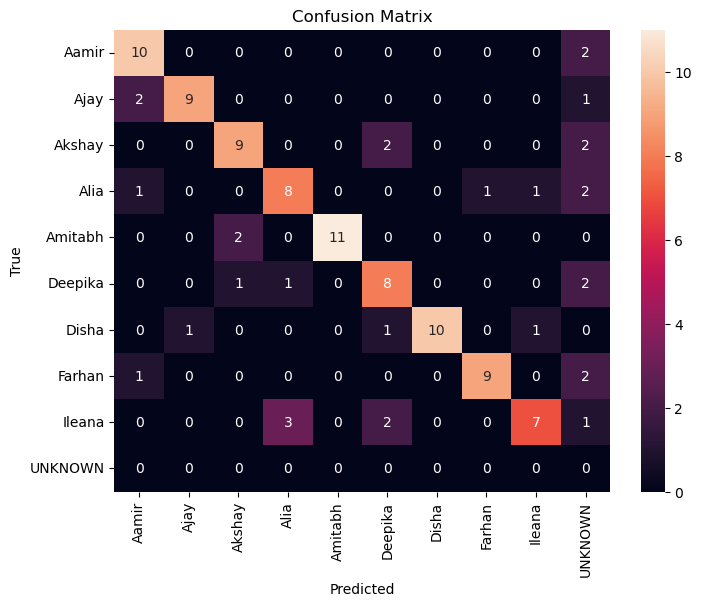

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Add UNKNOWN label
all_labels = list(range(len(class_names))) + [-1]
all_target_names = class_names + ["UNKNOWN"]

print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    labels=all_labels,
    target_names=all_target_names,
    zero_division=0
))

# Compute Confusion Matrix
labels = list(range(len(class_names)))
cm = confusion_matrix(y_test, y_pred, labels=all_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            xticklabels=all_target_names,
            yticklabels=all_target_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [20]:
import cv2

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

THRESHOLD = 0.65

cap = cv2.VideoCapture(0)

print("Press ESC to exit...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5
    )

    for (x, y, w_box, h_box) in faces:

        # Crop face region
        face = gray[y:y+h_box, x:x+w_box]

        # Resize to training size
        face_resized = cv2.resize(face, (h, w))
        face_vector = face_resized.flatten().reshape(1, -1)

        # PCA → LDA
        face_pca = pca.transform(face_vector)
        face_lda = lda.transform(face_pca)

        # Prediction
        prob = clf.predict_proba(face_lda)[0]
        max_prob = np.max(prob)
        class_id = np.argmax(prob)

        if max_prob < THRESHOLD:
            label = "UNKNOWN"
        else:
            label = class_names[class_id]

        # Draw rectangle
        cv2.rectangle(frame, (x, y), (x+w_box, y+h_box), (0,255,0), 2)

        # Display name
        cv2.putText(frame,
                    f"{label} ({max_prob:.2f})",
                    (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.8,
                    (0,255,0),
                    2)

    cv2.imshow("Real-Time Face Recognition", frame)

    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()


Press ESC to exit...


In [17]:
import joblib

# Save models
joblib.dump(clf, "mlp_face_model.pkl")
joblib.dump(pca, "pca_model.pkl")
joblib.dump(lda, "lda_model.pkl")
joblib.dump(class_names, "class_names.pkl")

print("Models saved successfully!")

Models saved successfully!


In [18]:
import joblib

clf = joblib.load("mlp_face_model.pkl")
pca = joblib.load("pca_model.pkl")
lda = joblib.load("lda_model.pkl")
class_names = joblib.load("class_names.pkl")

print("Models loaded successfully!")

Models loaded successfully!
